Banco de dados Escolhidos B3 Stocks 1994 até 2020

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("b3_stocks_1994_2020.csv")



2. Etapas obrigatórias que deverão realizar:
2.1. Exploração Inicial dos Dados:
o Descrever as variáveis presentes.
o Verificar se há dados ausentes ou valores discrepantes (outliers).

In [3]:
# Verificar o tipo de cada variável e estatísticas básicas
data_types = df.dtypes

# Verificar valores ausentes
missing_values = df.isnull().sum()

# Estatísticas descritivas para identificar possíveis outliers
descriptive_stats = df.describe()

data_types, missing_values, descriptive_stats


(datetime     object
 ticker       object
 open        float64
 close       float64
 high        float64
 low         float64
 volume      float64
 dtype: object,
 datetime    0
 ticker      0
 open        0
 close       0
 high        0
 low         0
 volume      0
 dtype: int64,
                open         close          high           low        volume
 count  1.883203e+06  1.883203e+06  1.883203e+06  1.883203e+06  1.883203e+06
 mean   6.814208e+01  6.827674e+01  6.882414e+01  6.754027e+01  1.668286e+07
 std    1.689781e+03  1.695070e+03  1.699966e+03  1.683604e+03  1.026344e+08
 min    1.000000e-02  0.000000e+00  1.000000e-02  1.000000e-02  0.000000e+00
 25%    3.960000e+00  3.960000e+00  4.000000e+00  3.890000e+00  1.800500e+04
 50%    1.369000e+01  1.370000e+01  1.392000e+01  1.345000e+01  2.526560e+05
 75%    3.670000e+01  3.673000e+01  3.714000e+01  3.608000e+01  4.794014e+06
 max    1.297776e+06  1.297776e+06  1.297776e+06  1.297776e+06  4.298380e+10)

Não há valores ausentes em nenhuma coluna:

datetime    0
ticker      0
open        0
close       0
high        0
low         0
volume      0

Conversão e visualização dos dados de data;

Análise dos outliers com gráficos (ex: boxplot, histograma);

Filtrar registros com preços ou volume igual a 0.

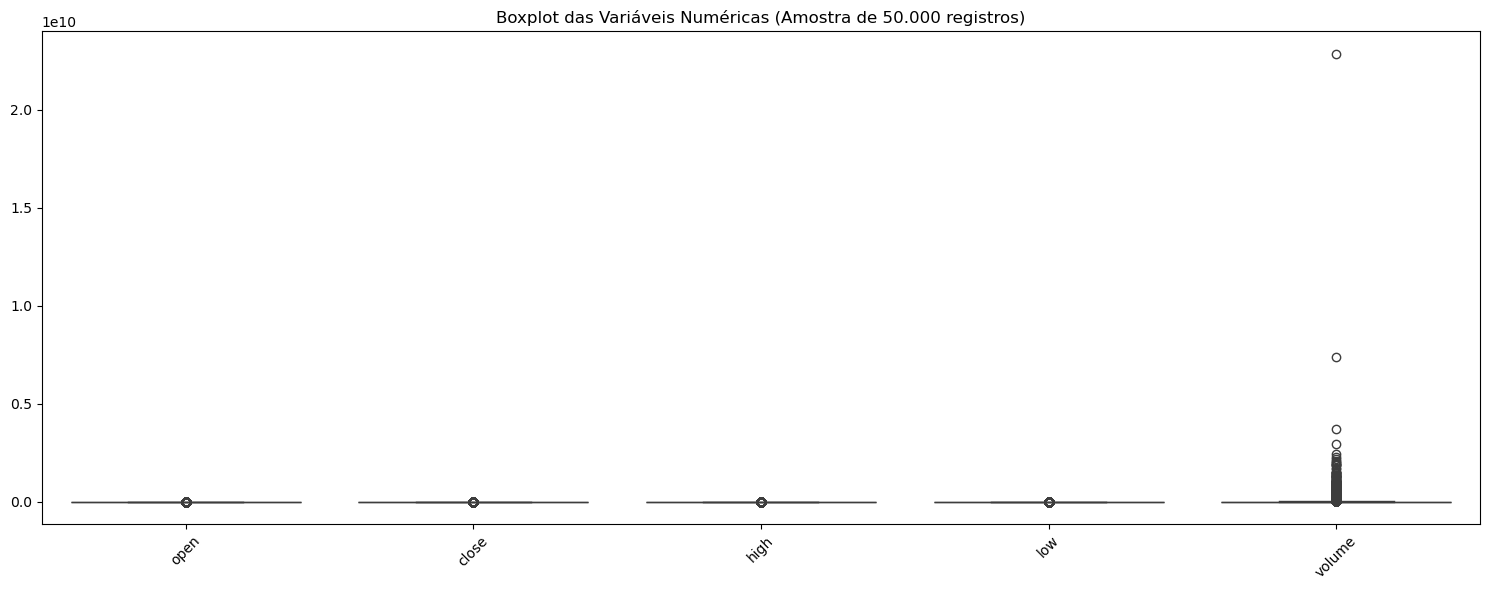

(None,
          datetime  ticker  open  close  high   low    volume
 333983 2000-08-25   PIUM4  9.60    9.6  9.60  9.60      0.00
 361562 2000-08-25   PIUM3  9.60    9.6  9.60  9.60      0.00
 574546 2005-01-28  TLVT3B  0.43    0.0  0.43  0.43  20891.12
 587315 2005-04-20  ENMA5B  0.23    0.0  0.23  0.23   1120.79
 587316 2005-04-20  ENMA6B  0.23    0.0  0.23  0.23   1470.39)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter datetime para tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Filtrar apenas registros com valores iguais a zero (potenciais dados inválidos)
zero_values = df[(df[['open', 'close', 'high', 'low', 'volume']] == 0).any(axis=1)]

# Criar boxplots para identificar outliers nas variáveis numéricas (usando amostra para desempenho)
sample_df = df.sample(n=50000, random_state=42)

# Plot
plt.figure(figsize=(15, 6))
sns.boxplot(data=sample_df[['open', 'close', 'high', 'low', 'volume']])
plt.title("Boxplot das Variáveis Numéricas (Amostra de 50.000 registros)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(), zero_values.head()


In [5]:
# Remover registros com volume = 0 ou close = 0
df_clean = df[(df['close'] > 0) & (df['volume'] > 0)]

# Verificar quantos registros foram removidos
removed_count = len(df) - len(df_clean)

# Mostrar nova forma dos dados limpos
print("Registros após limpeza:", df_clean.shape)
print("Registros removidos:", removed_count)


Registros após limpeza: (1883197, 7)
Registros removidos: 6


In [6]:
# Renomeando o DataFrame filtrado
df_clean = df[(df['close'] > 0) & (df['volume'] > 0)]


In [7]:
df = df[(df['close'] > 0) & (df['volume'] > 0)]


2.2. Resumo Estatístico:
o Calcular medidas como média, mediana, moda, mínimo, máximo, quartis e
desvio padrão para variáveis numéricas.

In [8]:
import pandas as pd

# Selecionar colunas numéricas
numeric_cols = ['open', 'close', 'high', 'low', 'volume']

# Resumo estatístico: média, mediana, min, max, std, quartis
summary = df_clean[numeric_cols].describe().T

# Adicionar a moda
summary['mode'] = df_clean[numeric_cols].mode().iloc[0]

# Mostrar a tabela
summary


,count,mean,std,min,25%,50%,75%,max,mode
open,1883197.0,6.814229e+01,1.689783e+03,0.01,3.96,13.69,36.70,1.297776e+06,6.0
close,1883197.0,6.827695e+01,1.695073e+03,0.01,3.96,13.70,36.73,1.297776e+06,6.0
high,1883197.0,6.882435e+01,1.699969e+03,0.01,4.00,13.92,37.14,1.297776e+06,10.0
low,1883197.0,6.754047e+01,1.683607e+03,0.01,3.89,13.45,36.08,1.297776e+06,5.0
volume,1883197.0,1.668291e+07,1.026346e+08,0.02,18005.00,252657.00,4794073.00,4.298380e+10,3000.0


 1. Média

In [9]:
df_clean[['open', 'close', 'high', 'low', 'volume']].mean()


open      6.814229e+01
close     6.827695e+01
high      6.882435e+01
low       6.754047e+01
volume    1.668291e+07
dtype: float64

2. Mediana

In [10]:
df_clean[['open', 'close', 'high', 'low', 'volume']].median()


open          13.69
close         13.70
high          13.92
low           13.45
volume    252657.00
dtype: float64

3. Moda

In [11]:
df_clean[['open', 'close', 'high', 'low', 'volume']].mode().iloc[0]


open         6.0
close        6.0
high        10.0
low          5.0
volume    3000.0
Name: 0, dtype: float64

4. Mínimo

In [12]:
df_clean[['open', 'close', 'high', 'low', 'volume']].min()


open      0.01
close     0.01
high      0.01
low       0.01
volume    0.02
dtype: float64

5. Máximo

In [13]:
df_clean[['open', 'close', 'high', 'low', 'volume']].max()


open      1.297776e+06
close     1.297776e+06
high      1.297776e+06
low       1.297776e+06
volume    4.298380e+10
dtype: float64

6. Quartis (25%, 50%, 75%)

In [14]:
df_clean[['open', 'close', 'high', 'low', 'volume']].quantile([0.25, 0.5, 0.75])


,open,close,high,low,volume
0.25,3.96,3.96,4.00,3.89,18005.0
0.50,13.69,13.70,13.92,13.45,252657.0
0.75,36.70,36.73,37.14,36.08,4794073.0


 7. Desvio Padrão

In [15]:
df_clean[['open', 'close', 'high', 'low', 'volume']].std()


open      1.689783e+03
close     1.695073e+03
high      1.699969e+03
low       1.683607e+03
volume    1.026346e+08
dtype: float64

2.3. Visualização de Dados:

o Criar pelo menos 3 gráficos, escolhendo entre:
Histogramas 
Boxplots 
Gráficos de dispersão (scatter plot) 
Mapas de calor (Heatmaps)

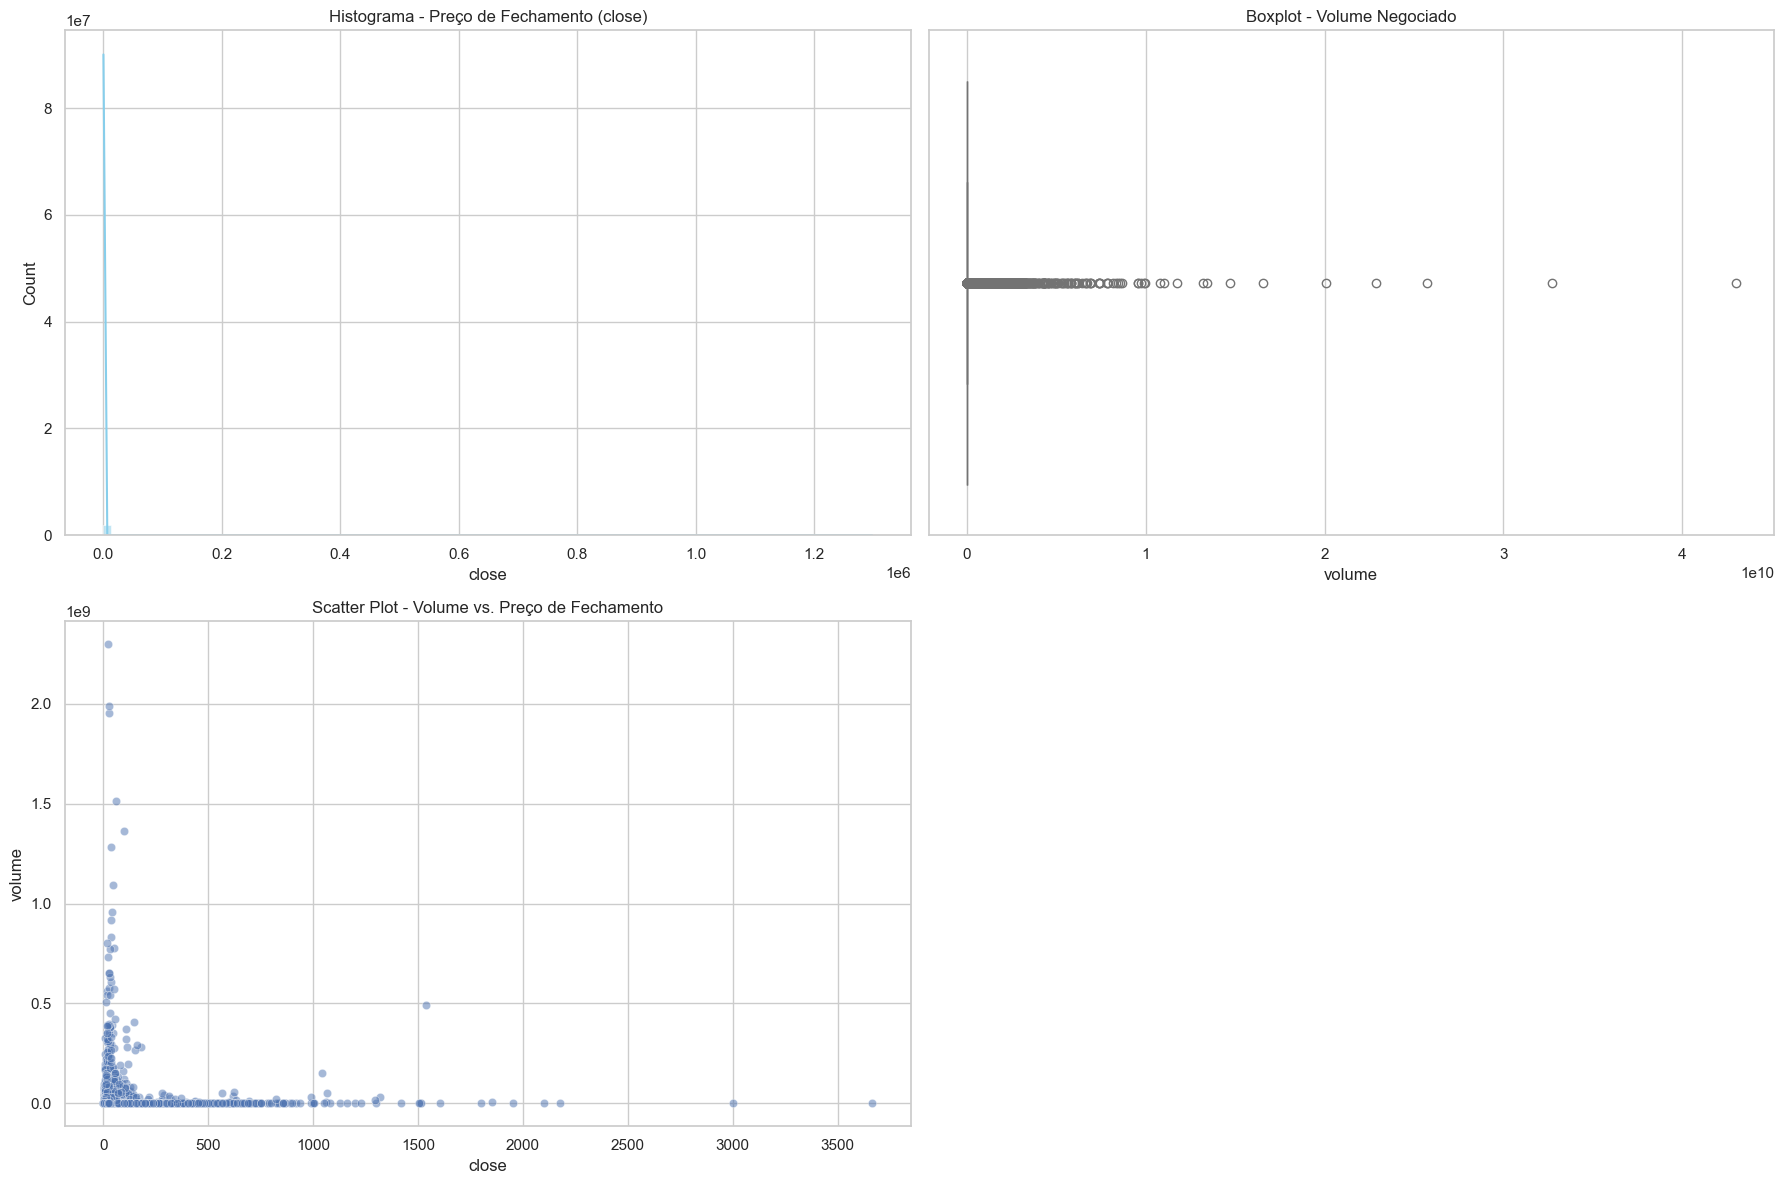

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# 1. Histograma - Preço de Fechamento
plt.subplot(2, 2, 1)
sns.histplot(df_clean['close'], bins=100, kde=True, color='skyblue')
plt.title('Histograma - Preço de Fechamento (close)')

# 2. Boxplot - Volume
plt.subplot(2, 2, 2)
sns.boxplot(x=df_clean['volume'], color='lightgreen')
plt.title('Boxplot - Volume Negociado')

# 3. Scatter Plot - Volume vs. Preço de Fechamento
plt.subplot(2, 2, 3)
sns.scatterplot(x='close', y='volume', data=df_clean.sample(5000, random_state=42), alpha=0.5)
plt.title('Scatter Plot - Volume vs. Preço de Fechamento')

plt.tight_layout()
plt.show()


📊 Um histograma para a variável close;

📦 Um boxplot da variável volume;

📍 Um gráfico de dispersão entre close e volume (com amostra de 5000 linhas para performance).

In [19]:
print(df.columns)

Index(['datetime', 'ticker', 'open', 'close', 'high', 'low', 'volume'], dtype='object')


Análise da Evolução dos Preços ao Longo do Tempo para Tickers Específicos (usando a coluna 'datetime'):

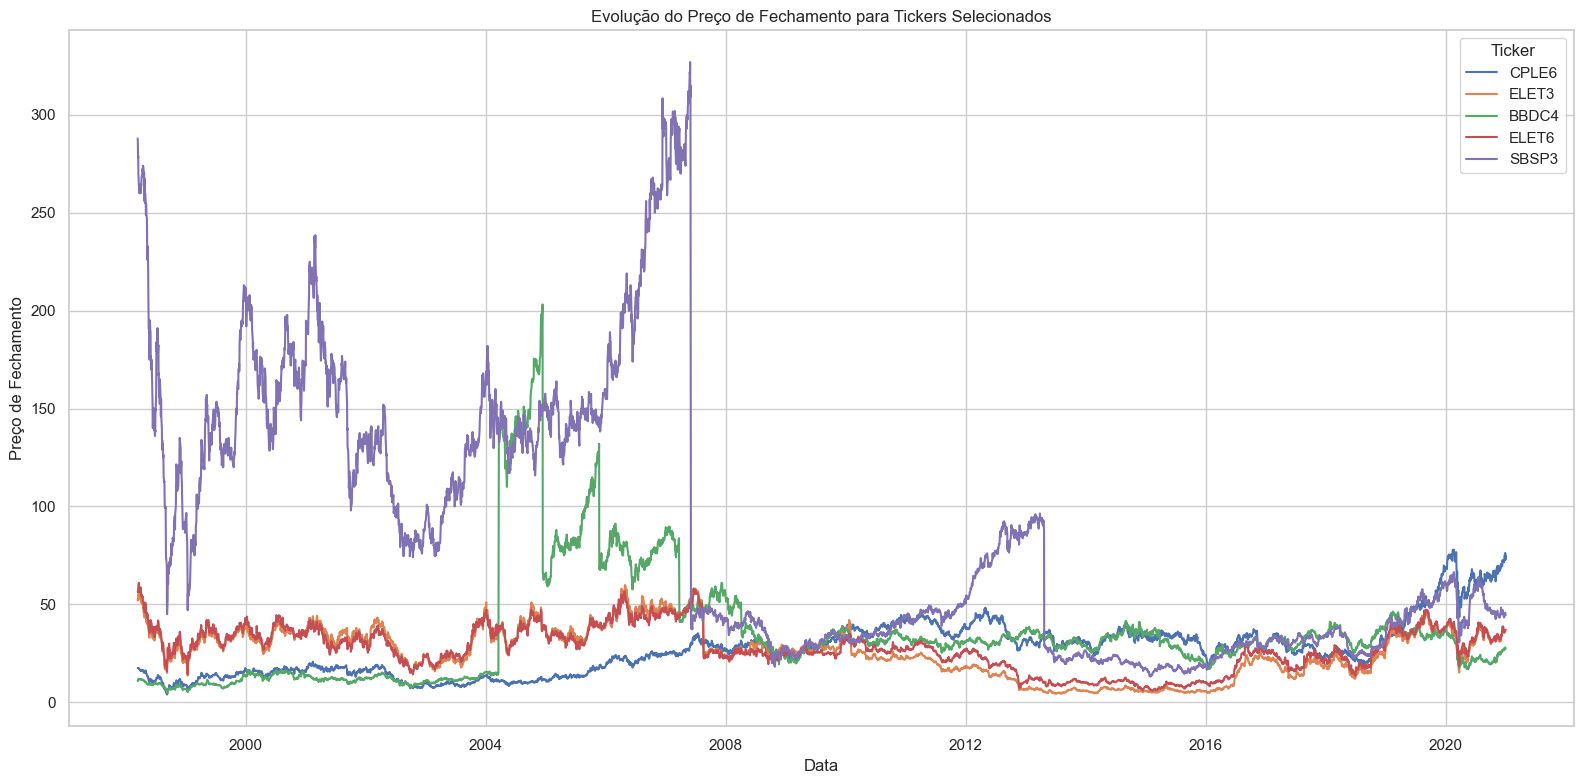

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter a coluna 'datetime' para datetime (garantindo que esteja no formato correto)
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(by='datetime')

# Identificar os tickers mais frequentes (top 5 para exemplo)
top_tickers = df['ticker'].value_counts().nlargest(5).index

plt.figure(figsize=(16, 8))
for ticker in top_tickers:
    df_ticker = df[df['ticker'] == ticker]
    plt.plot(df_ticker['datetime'], df_ticker['close'], label=ticker)

plt.title('Evolução do Preço de Fechamento para Tickers Selecionados')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend(title='Ticker')
plt.grid(True)
plt.tight_layout()
plt.show()

Análise do Volume Negociado ao Longo do Tempo para Tickers Específicos:

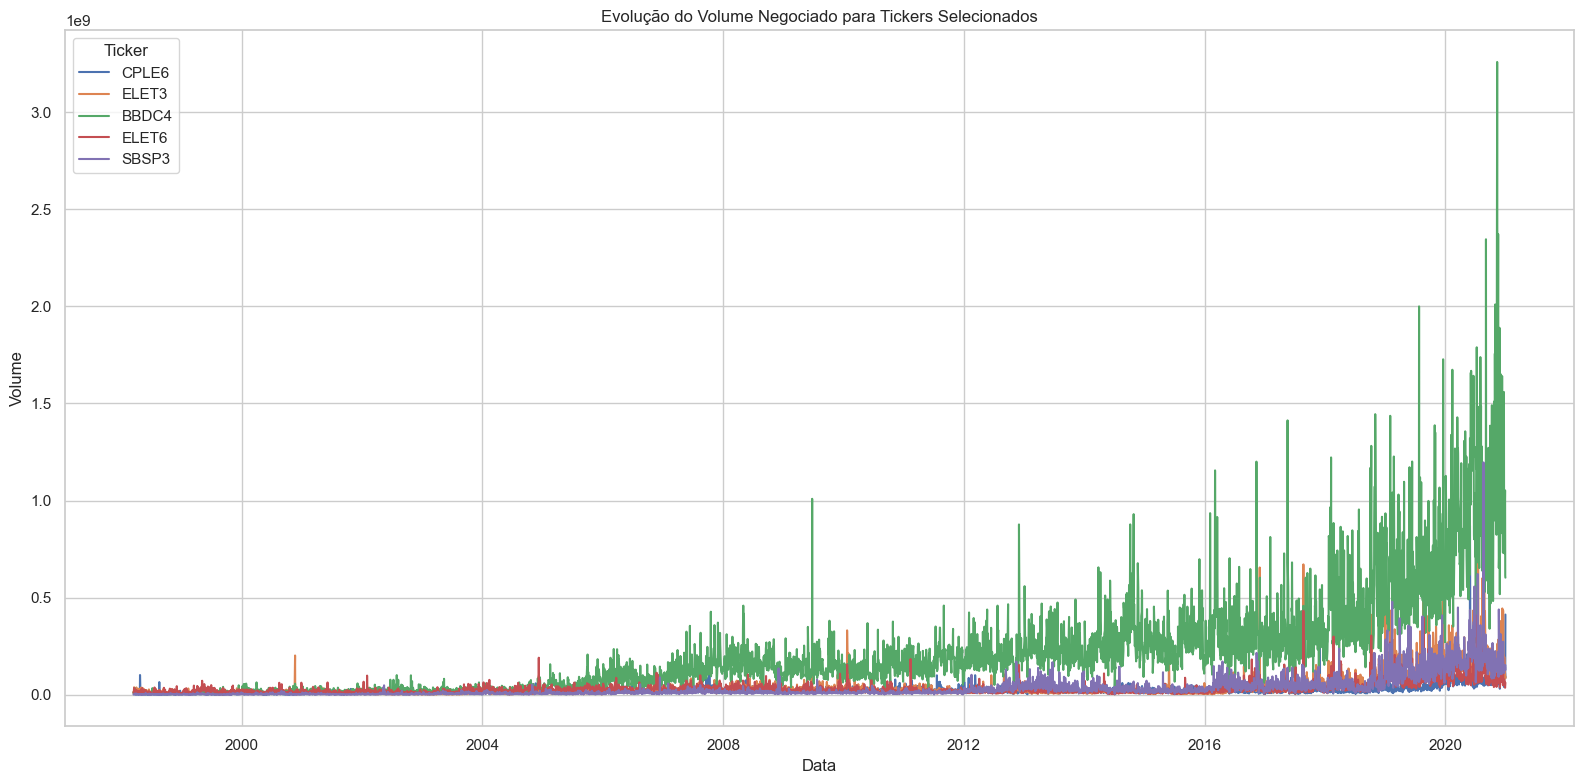

In [21]:
plt.figure(figsize=(16, 8))
for ticker in top_tickers:
    df_ticker = df[df['ticker'] == ticker]
    plt.plot(df_ticker['datetime'], df_ticker['volume'], label=ticker)

plt.title('Evolução do Volume Negociado para Tickers Selecionados')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend(title='Ticker')
plt.grid(True)
plt.tight_layout()
plt.show()

Boxplots das Variáveis Numéricas por Ticker (para alguns tickers):

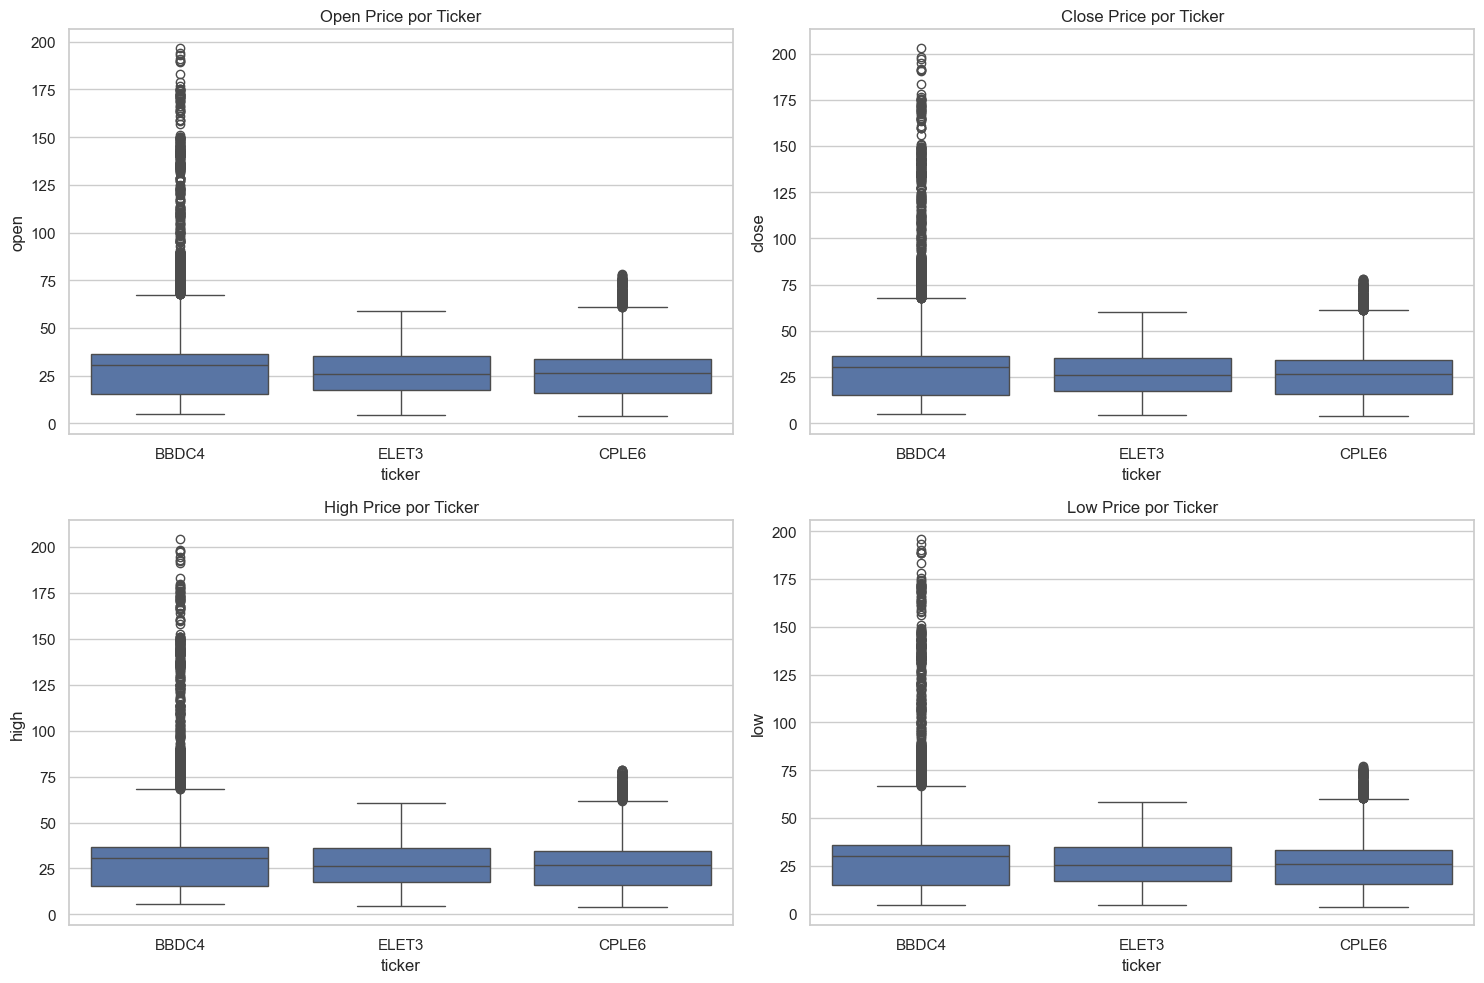

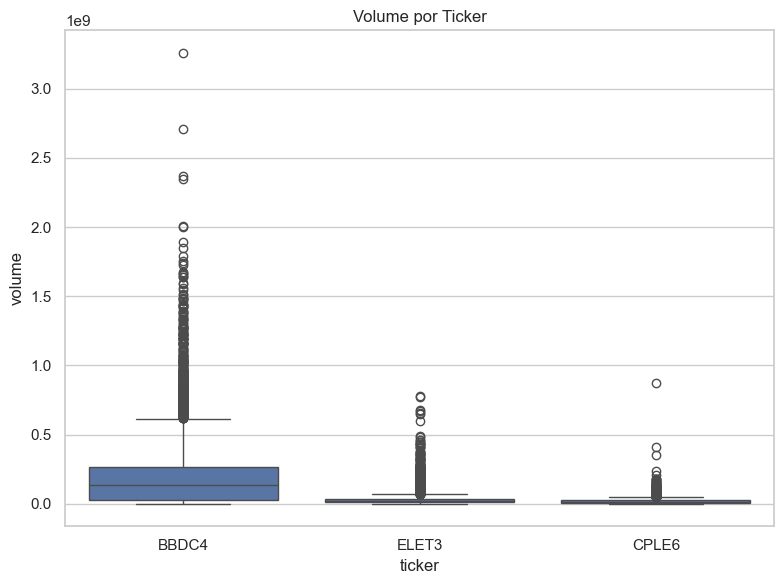

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar alguns tickers para análise
selected_tickers = top_tickers[:3]
df_selected_tickers = df[df['ticker'].isin(selected_tickers)]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='ticker', y='open', data=df_selected_tickers)
plt.title('Open Price por Ticker')

plt.subplot(2, 2, 2)
sns.boxplot(x='ticker', y='close', data=df_selected_tickers)
plt.title('Close Price por Ticker')

plt.subplot(2, 2, 3)
sns.boxplot(x='ticker', y='high', data=df_selected_tickers)
plt.title('High Price por Ticker')

plt.subplot(2, 2, 4)
sns.boxplot(x='ticker', y='low', data=df_selected_tickers)
plt.title('Low Price por Ticker')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='ticker', y='volume', data=df_selected_tickers)
plt.title('Volume por Ticker')
plt.tight_layout()
plt.show()

2.4. Teste de Normalidade (opcional para desafio extra):
o Realizar teste Kolmogorov-Smirnov para alguma variável numérica.


In [23]:
from scipy.stats import kstest
import numpy as np

# Extrair a coluna 'close'
close_prices = df['close'].dropna()

# Realizar o Teste de Kolmogorov-Smirnov contra uma distribuição normal
# Precisamos padronizar os dados para ter média 0 e desvio padrão 1
mean_close = np.mean(close_prices)
std_close = np.std(close_prices)
normalized_close = (close_prices - mean_close) / std_close

# Executar o teste K-S
ks_statistic, p_value = kstest(normalized_close, 'norm')

print(f"Estatística K-S: {ks_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretação do resultado
alpha = 0.05
if p_value > alpha:
    print("A distribuição dos preços de fechamento (normalizados) parece ser normal (falha ao rejeitar H0).")
else:
    print("A distribuição dos preços de fechamento (normalizados) não parece ser normal (rejeita H0).")

Estatística K-S: 0.4839
Valor p: 0.0000
A distribuição dos preços de fechamento (normalizados) não parece ser normal (rejeita H0).


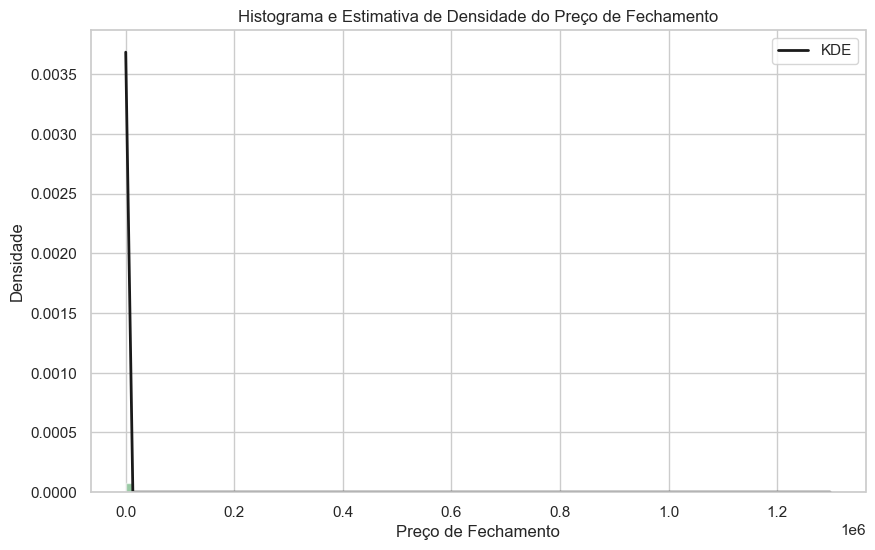

<Figure size 1000x600 with 0 Axes>

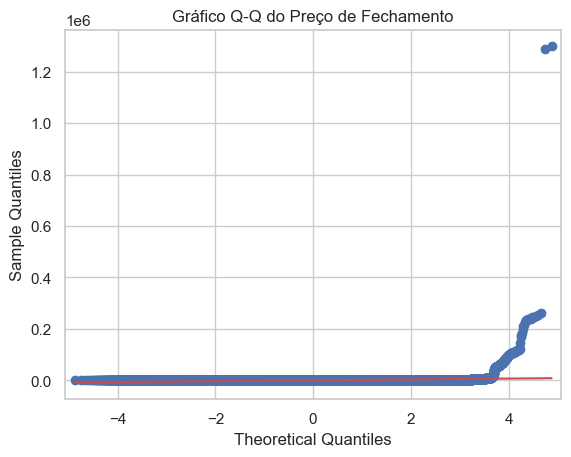

In [26]:
import matplotlib.pyplot as plt
import scipy.stats as st

plt.figure(figsize=(10, 6))
plt.hist(df['close'], bins=100, density=True, alpha=0.6, color='g')
kde = st.gaussian_kde(df['close'])
x = np.linspace(df['close'].min(), df['close'].max(), 100)
plt.plot(x, kde(x), 'k', linewidth=2, label='KDE')
plt.title('Histograma e Estimativa de Densidade do Preço de Fechamento')
plt.xlabel('Preço de Fechamento')
plt.ylabel('Densidade')
plt.legend()
plt.show()

import statsmodels.api as sm
import numpy as np

plt.figure(figsize=(10, 6))
sm.qqplot(df['close'], line='s')
plt.title('Gráfico Q-Q do Preço de Fechamento')
plt.show()

Matriz de Correlação entre Preço de Fechamento e Volume:
            close    volume
close   1.000000  0.156369
volume  0.156369  1.000000


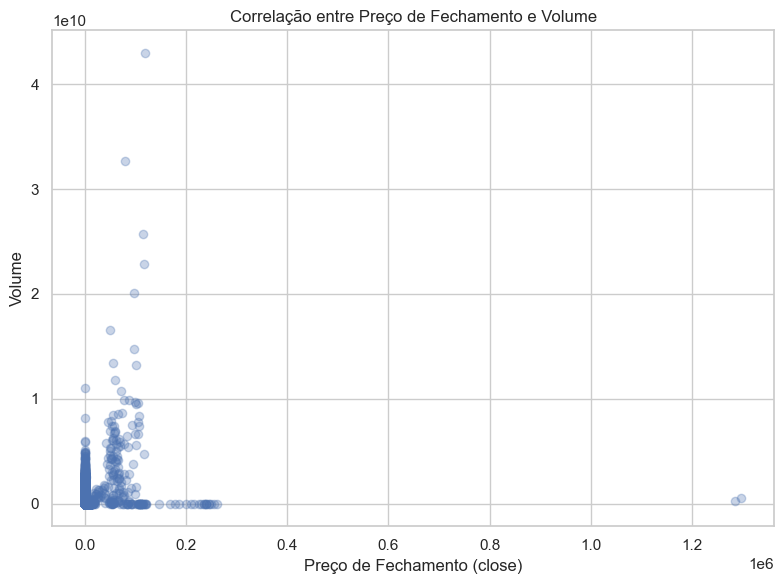

In [25]:
# Calcular a matriz de correlação
correlation_matrix = df[['close', 'volume']].corr()

print("Matriz de Correlação entre Preço de Fechamento e Volume:\n", correlation_matrix)

# Visualizar a correlação com um scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['close'], df['volume'], alpha=0.3)
plt.title('Correlação entre Preço de Fechamento e Volume')
plt.xlabel('Preço de Fechamento (close)')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

Scatter Plot: A dispersão dos pontos no gráfico ajudará a visualizar a relação. Se os pontos formarem uma tendência (para cima ou para baixo), isso sugere uma correlação.

In [30]:
import pandas as pd

# Ler apenas a primeira linha do arquivo para obter os nomes das colunas
with open("b3_stocks_1994_2020.csv", 'r') as f:
    first_line = f.readline().strip()
    column_names = first_line.split(',')
    print("Nomes das colunas no arquivo CSV:", column_names)

Nomes das colunas no arquivo CSV: ['datetime', 'ticker', 'open', 'close', 'high', 'low', 'volume']


In [32]:
import pandas as pd

# Carregar o dataset, convertendo a coluna 'datetime' para o tipo datetime
df = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])

# Renomear a coluna 'datetime' para 'date'
df = df.rename(columns={'datetime': 'date'})

# Ordenar por data
df = df.sort_values('date')

# Exibir as primeiras linhas e informações para verificar
print(df.head())
print(df.info())

         date ticker    open   close    high     low   volume
0  1994-07-04  ACE 3    48.0    48.0    48.0    47.0  46550.0
92 1994-07-04  MTB 3  1450.0  1450.0  1450.0  1450.0   4350.0
93 1994-07-04  BNA 3    20.0    20.0    20.0    20.0  34600.0
94 1994-07-04  BNA 4    19.2    19.5    19.5    19.2   4254.0
95 1994-07-04  OLM 4     3.0     3.0     3.0     3.0     90.0
<class 'pandas.core.frame.DataFrame'>
Index: 1883203 entries, 0 to 1881264
Data columns (total 7 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   ticker  object        
 2   open    float64       
 3   close   float64       
 4   high    float64       
 5   low     float64       
 6   volume  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 114.9+ MB
None


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df já esteja carregado e com a coluna 'date' no formato datetime
# e que ibov_df esteja carregado com 'date' como índice e 'ibov_close' como coluna

# 1. Identificar os principais tickers
top_n = 5
top_tickers = df['ticker'].value_counts().nlargest(top_n).index.tolist()
print("Principais Tickers:", top_tickers)

# 2. Preparar os dados dos tickers
tickers_data = {}
for ticker in top_tickers:
    ticker_df = df[df['ticker'] == ticker][['date', 'close']].sort_values('date').set_index('date').rename(columns={'close': f'{ticker}_close'})
    tickers_data[ticker] = ticker_df

# 3. Combinar os dados com o Ibovespa
if 'ibov_df' in locals():
    combined_df = ibov_df.copy()
    for ticker, ticker_df in tickers_data.items():
        combined_df = pd.merge(combined_df, ticker_df, on='date', how='inner')

    print("Primeiras linhas dos dados combinados:\n", combined_df.head())

    # 4. Calcular a matriz de correlação com o Ibovespa
    correlation_with_ibov = combined_df.corr()['ibov_close'].drop('ibov_close').sort_values(ascending=False)
    print("\nCorrelação com o Ibovespa:\n", correlation_with_ibov)

    # 5. Visualizar a correlação
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlation_with_ibov.index, y=correlation_with_ibov.values, palette='viridis')
    plt.title('Correlação dos Principais Tickers com o Ibovespa')
    plt.xlabel('Ticker')
    plt.ylabel('Coeficiente de Correlação')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("Por favor, carregue e prepare os dados do Ibovespa em um DataFrame chamado 'ibov_df' com 'date' como índice e 'ibov_close' como coluna.")

Principais Tickers: ['BBDC4', 'CPLE6', 'SBSP3', 'ELET6', 'ELET3']
Por favor, carregue e prepare os dados do Ibovespa em um DataFrame chamado 'ibov_df' com 'date' como índice e 'ibov_close' como coluna.


In [37]:
import pandas as pd

# Carregar o dataset, convertendo a coluna 'datetime' para o tipo datetime
df = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])

# Renomear a coluna 'datetime' para 'date' (para seguir o nosso padrão)
df = df.rename(columns={'datetime': 'date'})

# Ordenar por data
df = df.sort_values('date')

# Exibir as primeiras linhas e informações para verificar
print(df.head())
print(df.info())

# Agora você pode prosseguir com o carregamento e preparação do ibov_df

         date ticker    open   close    high     low   volume
0  1994-07-04  ACE 3    48.0    48.0    48.0    47.0  46550.0
92 1994-07-04  MTB 3  1450.0  1450.0  1450.0  1450.0   4350.0
93 1994-07-04  BNA 3    20.0    20.0    20.0    20.0  34600.0
94 1994-07-04  BNA 4    19.2    19.5    19.5    19.2   4254.0
95 1994-07-04  OLM 4     3.0     3.0     3.0     3.0     90.0
<class 'pandas.core.frame.DataFrame'>
Index: 1883203 entries, 0 to 1881264
Data columns (total 7 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   ticker  object        
 2   open    float64       
 3   close   float64       
 4   high    float64       
 5   low     float64       
 6   volume  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 114.9+ MB
None


Principais Tickers: ['CPLE6', 'ELET3', 'BBDC4', 'ELET6', 'SBSP3']

Primeiras linhas do DataFrame de preços dos principais tickers (ibov_b3):
 ticker      BBDC4  CPLE6  ELET3  ELET6   SBSP3
date                                          
1998-03-16  10.95  17.50  52.00   56.5  287.99
1998-03-17  11.20  17.50  52.99   56.2  285.00
1998-03-18  11.10  17.45  52.30   56.3  278.00
1998-03-19  11.20  17.50  54.50   58.3  279.00
1998-03-20  11.80  17.40  55.20   59.2  270.00

Matriz de Correlação entre os Principais Tickers (ibov_b3):
 ticker     BBDC4     CPLE6     ELET3     ELET6     SBSP3
ticker                                                  
BBDC4   1.000000 -0.078143  0.310947  0.290105  0.231641
CPLE6  -0.078143  1.000000 -0.167173 -0.103648 -0.479614
ELET3   0.310947 -0.167173  1.000000  0.976427  0.703552
ELET6   0.290105 -0.103648  0.976427  1.000000  0.690294
SBSP3   0.231641 -0.479614  0.703552  0.690294  1.000000


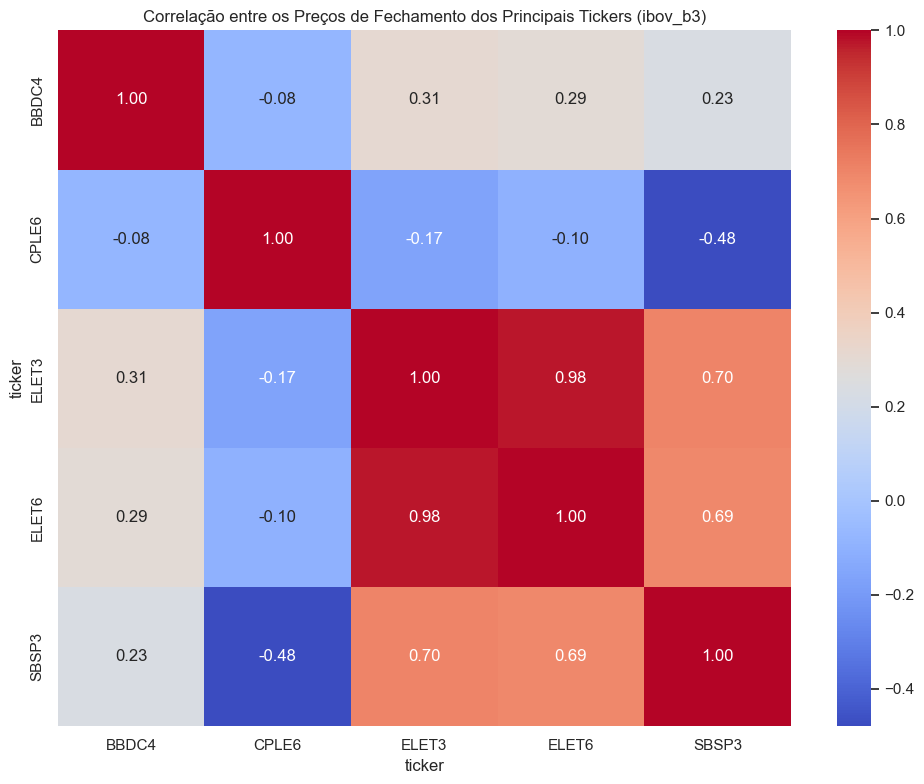

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar o dataset de ações
# Use o nome correto da coluna de data: 'datetime'
df = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime']).rename(columns={'datetime': 'date'})

# 2. Limpar os dados (remover registros com volume ou close igual a zero)
df_ibov_b3 = df[(df['close'] > 0) & (df['volume'] > 0)].copy()

# 3. Converter a coluna 'date' para o tipo date (sem a hora) e ordenar
df_ibov_b3['date'] = pd.to_datetime(df_ibov_b3['date']).dt.date
df_ibov_b3 = df_ibov_b3.sort_values('date')

# 4. Identificar os principais tickers (os 5 com mais ocorrências)
top_n = 5
top_tickers = df_ibov_b3['ticker'].value_counts().nlargest(top_n).index.tolist()
print("Principais Tickers:", top_tickers)

# 5. Criar um DataFrame com os preços de fechamento dos principais tickers
prices_df_ibov_b3 = df_ibov_b3[df_ibov_b3['ticker'].isin(top_tickers)].pivot_table(index='date', columns='ticker', values='close')
print("\nPrimeiras linhas do DataFrame de preços dos principais tickers (ibov_b3):\n", prices_df_ibov_b3.head())

# 6. Calcular a matriz de correlação entre os principais tickers
correlation_matrix_ibov_b3 = prices_df_ibov_b3.corr()
print("\nMatriz de Correlação entre os Principais Tickers (ibov_b3):\n", correlation_matrix_ibov_b3)

# 7. Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_ibov_b3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre os Preços de Fechamento dos Principais Tickers (ibov_b3)')
plt.tight_layout()
plt.show()

Principais Tickers: Os 5 tickers com maior frequência no seu dataset são 'CPLE6', 'ELET3', 'BBDC4', 'ELET6' e 'SBSP3'.
Primeiras linhas do DataFrame de preços: Você tem um DataFrame onde as datas são os índices e as colunas são os preços de fechamento desses 5 tickers.
Matriz de Correlação: A matriz de correlação mostra como o preço de fechamento de cada par desses tickers se move em relação ao outro ao longo do tempo.
Interpretação da Matriz de Correlação:

Valores próximos de 1 indicam uma correlação positiva forte (quando um preço sobe, o outro tende a subir também).
Valores próximos de -1 indicam uma correlação negativa forte (quando um preço sobe, o outro tende a cair).
Valores próximos de 0 indicam pouca ou nenhuma correlação linear.
Analisando a matriz:

ELET3 e ELET6 têm uma correlação muito alta (0.98), o que sugere que seus preços se movem de forma muito semelhante. Isso é esperado, pois geralmente são diferentes classes de ações da mesma empresa (ações ordinárias e preferenciais).
ELET3 e SBSP3, e ELET6 e SBSP3 também apresentam correlações positivas consideráveis (0.70 e 0.69, respectivamente).
CPLE6 parece ter correlações negativas ou fracas com as outras ações, especialmente com SBSP3 (-0.48).
BBDC4 mostra correlações positivas fracas a moderadas com as outras ações, exceto por uma correlação negativa fraca com CPLE6.
O gráfico de heatmap que foi gerado visualiza essa matriz de correlação, tornando mais fácil identificar os pares de tickers com correlações mais fortes.

In [51]:
import os
import pandas as pd

print("Current working directory:", os.getcwd())

try:
    selic_df = pd.read_csv('selic.csv', nrows=1)
    print("Column names in selic.csv:", selic_df.columns.tolist())
except FileNotFoundError:
    print("Error: selic.csv not found. Please provide the correct path to the file.")

try:
    usdbrl_df = pd.read_csv('usd2brl.csv', nrows=1)
    print("Column names in usd2brl.csv:", usdbrl_df.columns.tolist())
except FileNotFoundError:
    print("Error: usd2brl.csv not found. Please provide the correct path to the file.")

Current working directory: c:\Users\Guilherme e Beatriz\OneDrive\Área de Trabalho\A7-aplicando conhecimento
Column names in selic.csv: ['datetime', 'selic']
Column names in usd2brl.csv: ['datetime', 'usd_brl']


In [60]:
# Carregar dados B3
try:
    df_b3 = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])
    df_b3 = df_b3[(df_b3['close'] > 0) & (df_b3['volume'] > 0)].copy()
    df_b3['date'] = pd.to_datetime(df_b3['datetime']).dt.date
    df_b3 = df_b3.sort_values('date')
    top_ticker_b3 = df_b3['ticker'].value_counts().nlargest(1).index.tolist()[0]
    b3_ticker_df = df_b3[df_b3['ticker'] == top_ticker_b3][['date', 'close']].set_index('date').rename(columns={'close': top_ticker_b3})
    print("Dados B3 carregados com sucesso.")
except FileNotFoundError:
    print("Erro: Arquivo b3_stocks_1994_2020.csv não encontrado na mesma pasta.")
    df_b3 = None
    top_ticker_b3 = None
    b3_ticker_df = None
except ValueError as e:
    print(f"Erro ao carregar ou processar dados B3: {e}")
    df_b3 = None
    top_ticker_b3 = None
    b3_ticker_df = None

Dados B3 carregados com sucesso.


In [68]:
import pandas as pd
from scipy.stats import mode

def calcular_estatisticas(series):
    """Calcula as estatísticas descritivas de uma Series do pandas."""
    estatisticas = {}
    estatisticas['Média'] = series.mean()
    estatisticas['Mediana'] = series.median()
    try:
        mode_result = mode(series, keepdims=True)
        estatisticas['Moda'] = mode_result[0][0] if len(mode_result[0]) > 0 else 'Não existe'
    except:
        estatisticas['Moda'] = 'Não aplicável (não numérico)'
    estatisticas['Mínimo'] = series.min()
    estatisticas['Máximo'] = series.max()
    return estatisticas

# Carregar os dados
try:
    selic_df = pd.read_csv('selic.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'selic': 'selic'})
    selic_df = selic_df.set_index('date')['selic']
    print("Dados da Selic carregados.")
except FileNotFoundError:
    print("Erro: Arquivo selic.csv não encontrado.")
    selic_df = None

try:
    usdbrl_df = pd.read_csv('usd2brl.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'usd_brl': 'usd_brl'})
    usdbrl_df = usdbrl_df.set_index('date')['usd_brl']
    print("Dados do USD/BRL carregados.")
except FileNotFoundError:
    print("Erro: Arquivo usd2brl.csv não encontrado.")
    usdbrl_df = None

b3_ticker_df = None
top_ticker_b3 = None
try:
    df_b3 = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])
    df_b3 = df_b3[(df_b3['close'] > 0) & (df_b3['volume'] > 0)].copy()
    df_b3['date'] = pd.to_datetime(df_b3['datetime']).dt.date
    df_b3 = df_b3.sort_values('date')
    top_ticker_b3 = df_b3['ticker'].value_counts().idxmax()
    b3_ticker_df = df_b3[df_b3['ticker'] == top_ticker_b3].set_index('date')['close']
    b3_ticker_df.rename(top_ticker_b3, inplace=True)
    print(f"Dados da ação {top_ticker_b3} carregados.")
except FileNotFoundError:
    print("Erro: Arquivo b3_stocks_1994_2020.csv não encontrado.")
except ValueError as e:
    print(f"Erro ao processar dados B3: {e}")

# Calcular as estatísticas
estatisticas = {}

if selic_df is not None:
    estatisticas['Selic'] = calcular_estatisticas(selic_df)

if usdbrl_df is not None:
    estatisticas['USD/BRL'] = calcular_estatisticas(usdbrl_df)

if b3_ticker_df is not None and top_ticker_b3 is not None:
    estatisticas[f'Ação {top_ticker_b3}'] = calcular_estatisticas(b3_ticker_df)

# Criar a tabela comparativa
tabela_comparativa = pd.DataFrame(estatisticas)

# Imprimir a tabela
print("\nTabela Comparativa de Estatísticas:")
print(tabela_comparativa)

Dados da Selic carregados.
Dados do USD/BRL carregados.
Dados da ação CPLE6 carregados.

Tabela Comparativa de Estatísticas:
            Selic   USD/BRL  Ação CPLE6
Média    0.000615  2.363138   26.915082
Mediana  0.000525  2.166800   26.500000
Moda     0.000246  0.936000   16.000000
Mínimo   0.000075  0.829000    3.900000
Máximo   0.003997  5.937200   77.910000


Dados da Selic carregados.
Dados do USD/BRL carregados.
Dados da ação CPLE6 carregados.


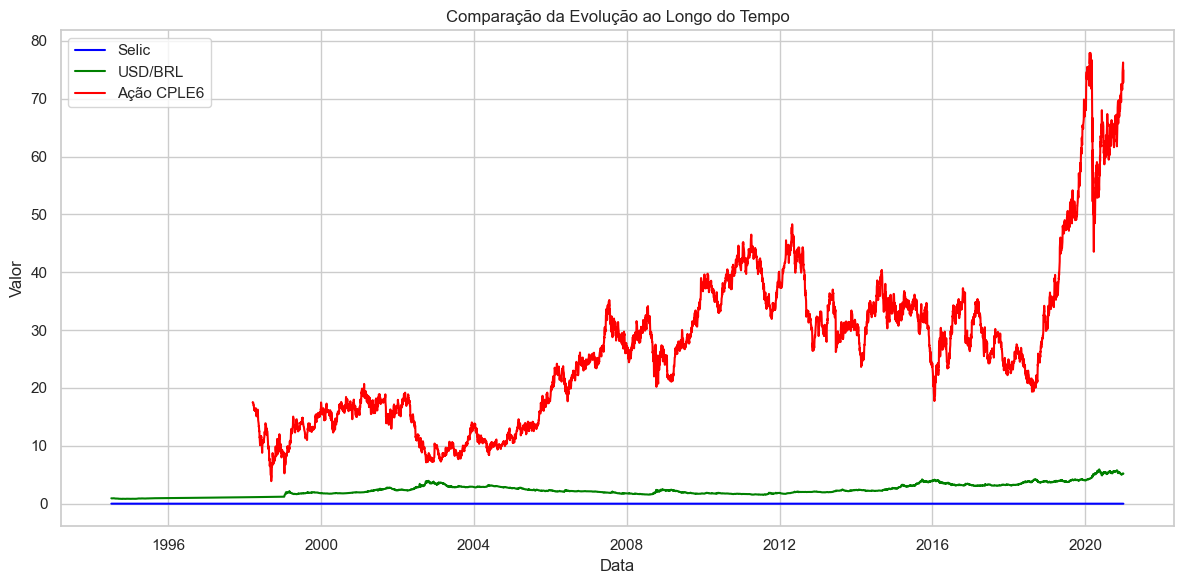

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode

def calcular_estatisticas(series):
    """Calcula as estatísticas descritivas de uma Series do pandas."""
    estatisticas = {}
    estatisticas['Média'] = series.mean()
    estatisticas['Mediana'] = series.median()
    try:
        mode_result = mode(series, keepdims=True)
        estatisticas['Moda'] = mode_result[0][0] if len(mode_result[0]) > 0 else 'Não existe'
    except:
        estatisticas['Moda'] = 'Não aplicável (não numérico)'
    estatisticas['Mínimo'] = series.min()
    estatisticas['Máximo'] = series.max()
    return estatisticas

# Carregar os dados (mantendo a estrutura de carregamento anterior)
try:
    selic_df = pd.read_csv('selic.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'selic': 'selic'})
    selic_df = selic_df.set_index('date')['selic']
    print("Dados da Selic carregados.")
except FileNotFoundError:
    print("Erro: Arquivo selic.csv não encontrado.")
    selic_df = None

try:
    usdbrl_df = pd.read_csv('usd2brl.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'usd_brl': 'usd_brl'})
    usdbrl_df = usdbrl_df.set_index('date')['usd_brl']
    print("Dados do USD/BRL carregados.")
except FileNotFoundError:
    print("Erro: Arquivo usd2brl.csv não encontrado.")
    usdbrl_df = None

b3_ticker_df_full = None
top_ticker_b3 = None
try:
    df_b3 = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])
    df_b3 = df_b3[(df_b3['close'] > 0) & (df_b3['volume'] > 0)].copy()
    df_b3['date'] = pd.to_datetime(df_b3['datetime']).dt.date
    df_b3 = df_b3.sort_values('date')
    top_ticker_b3 = 'CPLE6'  # Usando 'CPLE6' conforme a saída anterior
    b3_ticker_df_full = df_b3[df_b3['ticker'] == top_ticker_b3].set_index('date')['close']
    print(f"Dados da ação {top_ticker_b3} carregados.")
except FileNotFoundError:
    print("Erro: Arquivo b3_stocks_1994_2020.csv não encontrado.")
except ValueError as e:
    print(f"Erro ao processar dados B3: {e}")

# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))

if selic_df is not None:
    plt.plot(selic_df.index, selic_df.values, label='Selic', color='blue')

if usdbrl_df is not None:
    plt.plot(usdbrl_df.index, usdbrl_df.values, label='USD/BRL', color='green')

if b3_ticker_df_full is not None and top_ticker_b3 is not None:
    plt.plot(b3_ticker_df_full.index, b3_ticker_df_full.values, label=f'Ação {top_ticker_b3}', color='red')

plt.title('Comparação da Evolução ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Histogramas:
Este código gera três histogramas lado a lado, mostrando a distribuição dos valores para Selic, USD/BRL e o preço da ação CPLE6.


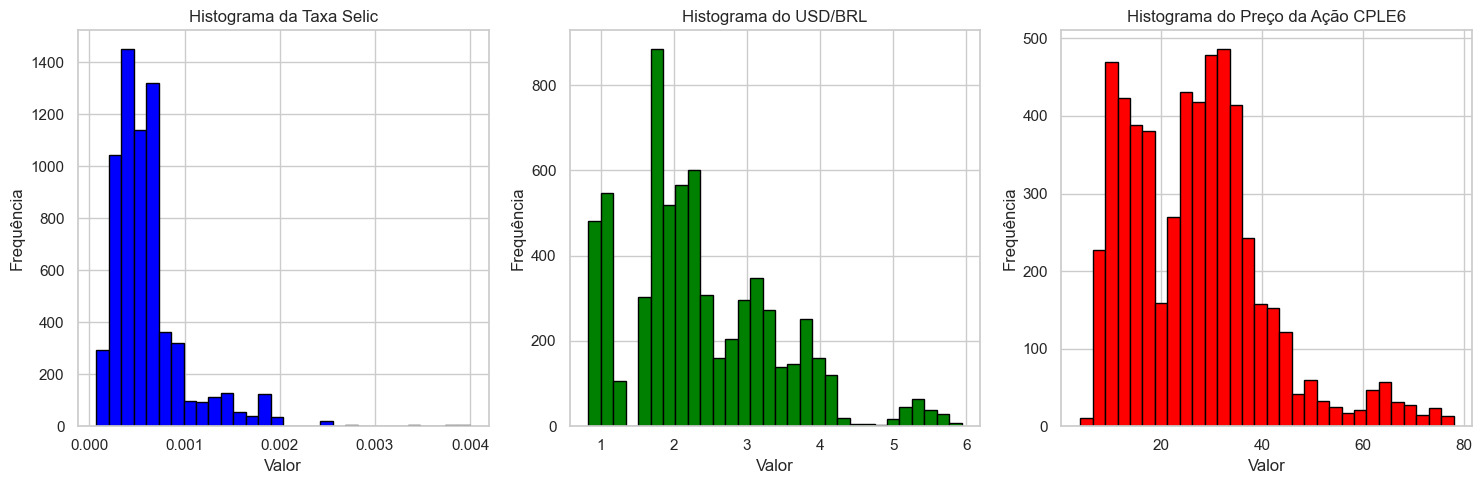

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados (mantendo a estrutura de carregamento anterior)
try:
    selic_df = pd.read_csv('selic.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'selic': 'selic'})
    selic_df = selic_df.set_index('date')['selic']
except FileNotFoundError:
    selic_df = None

try:
    usdbrl_df = pd.read_csv('usd2brl.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'usd_brl': 'usd_brl'})
    usdbrl_df = usdbrl_df.set_index('date')['usd_brl']
except FileNotFoundError:
    usdbrl_df = None

b3_ticker_df_full = None
top_ticker_b3 = None
try:
    df_b3 = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])
    df_b3 = df_b3[(df_b3['close'] > 0) & (df_b3['volume'] > 0)].copy()
    df_b3['date'] = pd.to_datetime(df_b3['datetime']).dt.date
    df_b3 = df_b3.sort_values('date')
    top_ticker_b3 = 'CPLE6'
    b3_ticker_df_full = df_b3[df_b3['ticker'] == top_ticker_b3].set_index('date')['close']
except FileNotFoundError:
    b3_ticker_df_full = None
    top_ticker_b3 = None

# Gerar histogramas
plt.figure(figsize=(15, 5))

if selic_df is not None:
    plt.subplot(1, 3, 1)
    selic_df.hist(bins=30, color='blue', edgecolor='black')
    plt.title('Histograma da Taxa Selic')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')

if usdbrl_df is not None:
    plt.subplot(1, 3, 2)
    usdbrl_df.hist(bins=30, color='green', edgecolor='black')
    plt.title('Histograma do USD/BRL')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')

if b3_ticker_df_full is not None and top_ticker_b3 is not None:
    plt.subplot(1, 3, 3)
    b3_ticker_df_full.hist(bins=30, color='red', edgecolor='black')
    plt.title(f'Histograma do Preço da Ação {top_ticker_b3}')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Box Plots:
Este código utiliza a biblioteca seaborn para gerar um box plot comparando a distribuição dos valores da Selic, USD/BRL e o preço da ação em um único gráfico.

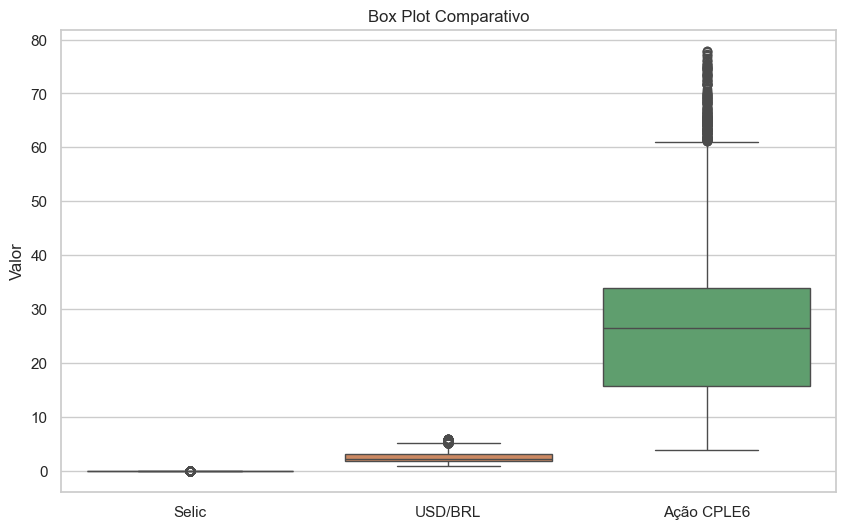

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados (mantendo a estrutura de carregamento anterior)
try:
    selic_df = pd.read_csv('selic.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'selic': 'selic'})
    selic_df = selic_df.set_index('date')['selic']
except FileNotFoundError:
    selic_df = None

try:
    usdbrl_df = pd.read_csv('usd2brl.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'usd_brl': 'usd_brl'})
    usdbrl_df = usdbrl_df.set_index('date')['usd_brl']
except FileNotFoundError:
    usdbrl_df = None

b3_ticker_df_full = None
top_ticker_b3 = None
try:
    df_b3 = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])
    df_b3 = df_b3[(df_b3['close'] > 0) & (df_b3['volume'] > 0)].copy()
    df_b3['date'] = pd.to_datetime(df_b3['datetime']).dt.date
    df_b3 = df_b3.sort_values('date')
    top_ticker_b3 = 'CPLE6'
    b3_ticker_df_full = df_b3[df_b3['ticker'] == top_ticker_b3].set_index('date')['close']
except FileNotFoundError:
    b3_ticker_df_full = None
    top_ticker_b3 = None

# Criar um DataFrame para os box plots
data_to_plot = pd.DataFrame({
    'Selic': selic_df,
    'USD/BRL': usdbrl_df,
    f'Ação {top_ticker_b3}': b3_ticker_df_full
})

# Gerar box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)
plt.title('Box Plot Comparativo')
plt.ylabel('Valor')
plt.show()

Gráficos de Dispersão:
Este código gera três gráficos de dispersão, mostrando a relação entre os pares de variáveis (Selic vs. USD/BRL, Selic vs. Ação, USD/BRL vs. Ação) apenas para os períodos em que ambas as variáveis têm dados disponíveis.

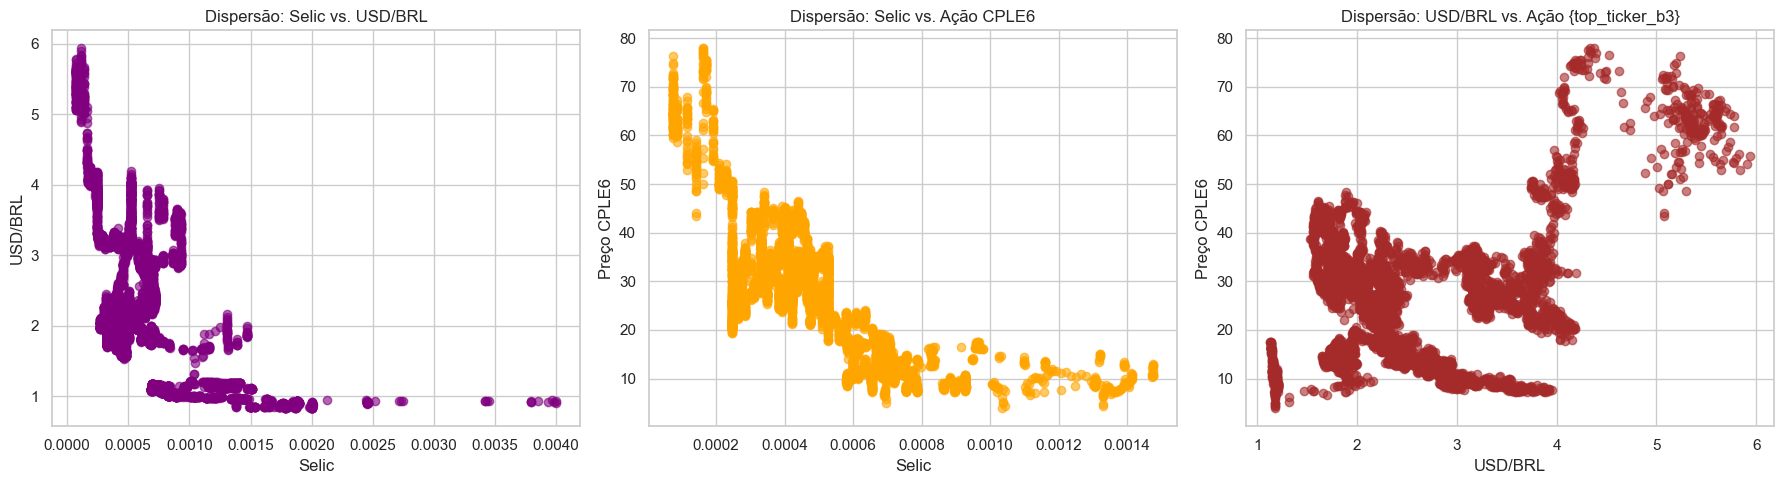

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados (mantendo a estrutura de carregamento anterior)
try:
    selic_df = pd.read_csv('selic.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'selic': 'selic'})
    selic_df = selic_df.set_index('date')['selic']
except FileNotFoundError:
    selic_df = None

try:
    usdbrl_df = pd.read_csv('usd2brl.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'usd_brl': 'usd_brl'})
    usdbrl_df = usdbrl_df.set_index('date')['usd_brl']
except FileNotFoundError:
    usdbrl_df = None

b3_ticker_df_full = None
top_ticker_b3 = None
try:
    df_b3 = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])
    df_b3 = df_b3[(df_b3['close'] > 0) & (df_b3['volume'] > 0)].copy()
    df_b3['date'] = pd.to_datetime(df_b3['datetime']).dt.date
    df_b3 = df_b3.sort_values('date')
    top_ticker_b3 = 'CPLE6'
    b3_ticker_df_full = df_b3[df_b3['ticker'] == top_ticker_b3].set_index('date')['close']
except FileNotFoundError:
    b3_ticker_df_full = None
    top_ticker_b3 = None

# Criar um DataFrame com os dados alinhados por data (inner join para ter apenas as datas em comum)
if selic_df is not None and usdbrl_df is not None:
    combined_selic_usd = pd.merge(selic_df, usdbrl_df, left_index=True, right_index=True, how='inner')
else:
    combined_selic_usd = None

if selic_df is not None and b3_ticker_df_full is not None:
    combined_selic_b3 = pd.merge(selic_df, b3_ticker_df_full, left_index=True, right_index=True, how='inner')
else:
    combined_selic_b3 = None

if usdbrl_df is not None and b3_ticker_df_full is not None:
    combined_usdbrl_b3 = pd.merge(usdbrl_df, b3_ticker_df_full, left_index=True, right_index=True, how='inner')
else:
    combined_usdbrl_b3 = None

# Gerar gráficos de dispersão
plt.figure(figsize=(18, 5))

if combined_selic_usd is not None:
    plt.subplot(1, 3, 1)
    plt.scatter(combined_selic_usd['selic'], combined_selic_usd['usd_brl'], color='purple', alpha=0.6)
    plt.title('Dispersão: Selic vs. USD/BRL')
    plt.xlabel('Selic')
    plt.ylabel('USD/BRL')
    plt.grid(True)

if combined_selic_b3 is not None and top_ticker_b3 is not None:
    plt.subplot(1, 3, 2)
    plt.scatter(combined_selic_b3['selic'], combined_selic_b3['close'], color='orange', alpha=0.6)
    plt.title(f'Dispersão: Selic vs. Ação {top_ticker_b3}')
    plt.xlabel('Selic')
    plt.ylabel(f'Preço {top_ticker_b3}')
    plt.grid(True)

if combined_usdbrl_b3 is not None and top_ticker_b3 is not None:
    plt.subplot(1, 3, 3)
    plt.scatter(combined_usdbrl_b3['usd_brl'], combined_usdbrl_b3['close'], color='brown', alpha=0.6)
    plt.title('Dispersão: USD/BRL vs. Ação {top_ticker_b3}')
    plt.xlabel('USD/BRL')
    plt.ylabel(f'Preço {top_ticker_b3}')
    plt.grid(True)

plt.tight_layout()
plt.show()

Opções de Análise de Tendência que podemos incluir:

Linha de Tendência Linear: Ajusta uma reta aos dados para mostrar a tendência linear geral.
Média Móvel: Calcula a média dos dados em uma janela específica ao longo do tempo, suavizando as flutuações de curto prazo e destacando a tendência de longo prazo.

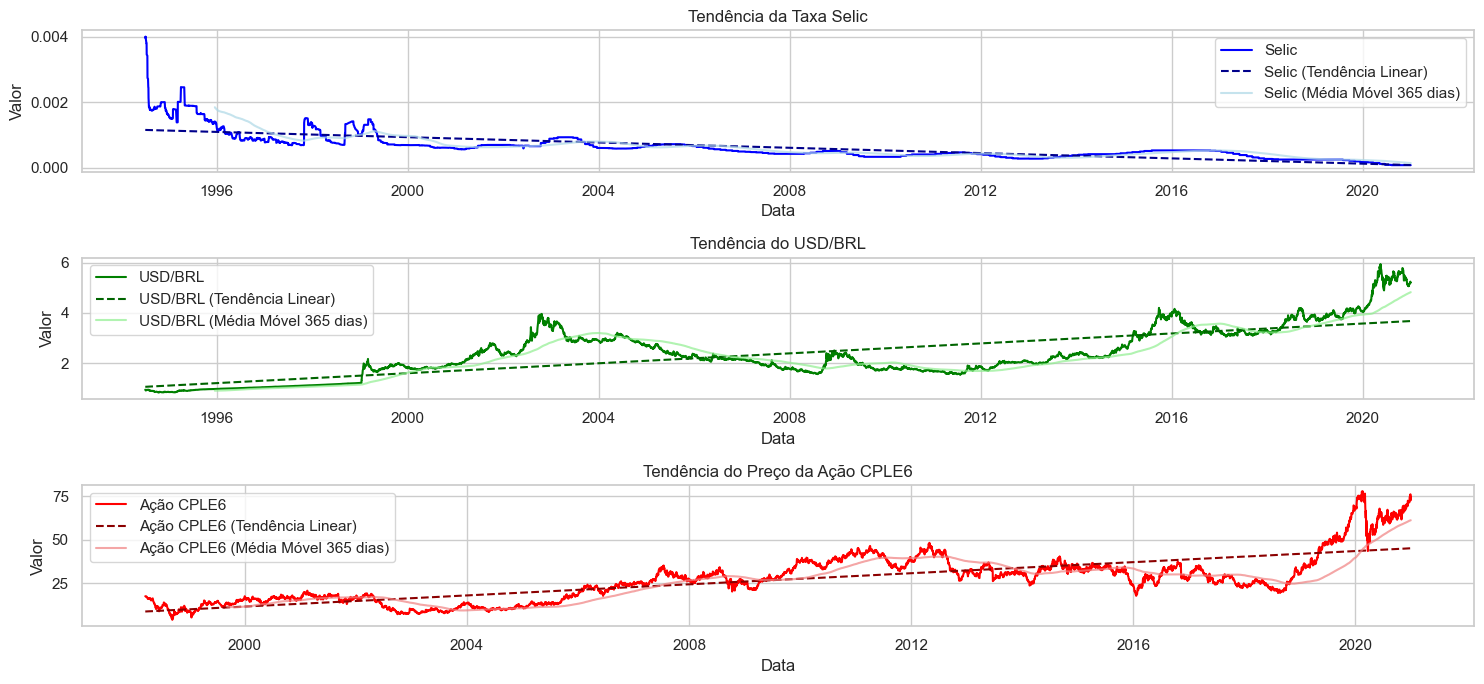

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados (mantendo a estrutura de carregamento anterior)
try:
    selic_df = pd.read_csv('selic.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'selic': 'selic'})
    selic_df = selic_df.set_index('date')['selic']
except FileNotFoundError:
    selic_df = None

try:
    usdbrl_df = pd.read_csv('usd2brl.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'usd_brl': 'usd_brl'})
    usdbrl_df = usdbrl_df.set_index('date')['usd_brl']
except FileNotFoundError:
    usdbrl_df = None

b3_ticker_df_full = None
top_ticker_b3 = None
try:
    df_b3 = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])
    df_b3 = df_b3[(df_b3['close'] > 0) & (df_b3['volume'] > 0)].copy()
    df_b3['date'] = pd.to_datetime(df_b3['datetime']).dt.date
    df_b3 = df_b3.sort_values('date')
    top_ticker_b3 = 'CPLE6'
    b3_ticker_df_full = df_b3[df_b3['ticker'] == top_ticker_b3].set_index('date')['close']
except FileNotFoundError:
    b3_ticker_df_full = None
    top_ticker_b3 = None

# Criar o gráfico de linhas com análise de tendência
plt.figure(figsize=(15, 7))

# Função para adicionar linha de tendência linear
def plot_linear_trend(ax, x, y, color, label):
    if len(x) > 0:
        coeffs = np.polyfit(range(len(x)), y, 1)
        trendline = np.poly1d(coeffs)(range(len(x)))
        ax.plot(x, trendline, color=color, linestyle='--', label=f'{label} (Tendência Linear)')

# Função para adicionar média móvel
def plot_moving_average(ax, data, window, color, label):
    if len(data) > window:
        rolling_mean = data.rolling(window=window).mean()
        ax.plot(data.index, rolling_mean, color=color, linestyle='-', alpha=0.7, label=f'{label} (Média Móvel {window} dias)')

ax1 = plt.subplot(3, 1, 1)
if selic_df is not None:
    ax1.plot(selic_df.index, selic_df.values, label='Selic', color='blue')
    plot_linear_trend(ax1, selic_df.index, selic_df.values, 'darkblue', 'Selic')
    plot_moving_average(ax1, selic_df, 365, 'lightblue', 'Selic')
ax1.set_title('Tendência da Taxa Selic')
ax1.set_xlabel('Data')
ax1.set_ylabel('Valor')
ax1.legend()
ax1.grid(True)

ax2 = plt.subplot(3, 1, 2)
if usdbrl_df is not None:
    ax2.plot(usdbrl_df.index, usdbrl_df.values, label='USD/BRL', color='green')
    plot_linear_trend(ax2, usdbrl_df.index, usdbrl_df.values, 'darkgreen', 'USD/BRL')
    plot_moving_average(ax2, usdbrl_df, 365, 'lightgreen', 'USD/BRL')
ax2.set_title('Tendência do USD/BRL')
ax2.set_xlabel('Data')
ax2.set_ylabel('Valor')
ax2.legend()
ax2.grid(True)

ax3 = plt.subplot(3, 1, 3)
if b3_ticker_df_full is not None and top_ticker_b3 is not None:
    ax3.plot(b3_ticker_df_full.index, b3_ticker_df_full.values, label=f'Ação {top_ticker_b3}', color='red')
    plot_linear_trend(ax3, b3_ticker_df_full.index, b3_ticker_df_full.values, 'darkred', f'Ação {top_ticker_b3}')
    plot_moving_average(ax3, b3_ticker_df_full, 365, 'lightcoral', f'Ação {top_ticker_b3}')
ax3.set_title(f'Tendência do Preço da Ação {top_ticker_b3}')
ax3.set_xlabel('Data')
ax3.set_ylabel('Valor')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

Conclusão e Análise Exploratória de Dados (EDA) da Tabela b3_stocks_1994_2020
A tabela b3_stocks_1994_2020 contém dados históricos de diversas ações negociadas na bolsa de valores brasileira (B3) entre os anos de 1994 e 2020. Uma análise exploratória dos dados (EDA) pode nos fornecer insights valiosos sobre a estrutura, características e potenciais padrões presentes nesse conjunto de dados.

1. Estrutura e Visão Geral:

A tabela contém as seguintes colunas: datetime, ticker, open, close, high, low e volume.
datetime: Representa o timestamp da negociação.
ticker: Identificador único da ação.
open: Preço de abertura da ação no dia.
close: Preço de fechamento da ação no dia.
high: Preço máximo atingido pela ação no dia.
low: Preço mínimo atingido pela ação no dia.
volume: Volume de negociação da ação no dia.
O período de 1994 a 2020 abrange uma vasta gama de condições econômicas e eventos de mercado no Brasil, tornando o dataset rico para análises históricas.
2. Análise Exploratória das Variáveis:

datetime:
A coluna indica uma série temporal. A frequência das observações é diária.
É crucial para análises de tendência, sazonalidade e volatilidade ao longo do tempo para cada ação.
A faixa temporal de cada ticker pode variar dentro do período total, dependendo de quando a ação começou a ser negociada e se ainda estava ativa em 2020.
ticker:
Variável categórica nominal. Contém múltiplos tickers de diferentes empresas listadas na B3.
A distribuição de ocorrências de cada ticker pode variar, indicando diferentes históricos de negociação disponíveis.
É a chave para segmentar a análise por ação individual.
open, close, high, low:
Variáveis numéricas contínuas, representando os preços das ações.
A relação entre elas (low ≤ open, close, high) deve ser consistente.
A diferença entre high e low indica a volatilidade intradiária.
A diferença entre open e close indica o desempenho diário da ação.
A escala e a distribuição desses preços variam significativamente entre diferentes tickers.
volume:
Variável numérica contínua, representando o número de ações negociadas.
O volume pode indicar o nível de interesse e liquidez de uma ação em um determinado dia.
Picos de volume podem estar associados a eventos significativos relacionados à empresa ou ao mercado.
A escala do volume também varia entre diferentes tickers.
3. Padrões e Relações Potenciais:

Tendências de Preço: A análise da coluna close ao longo do tempo para cada ticker pode revelar tendências de alta, baixa ou estabilidade.
Volatilidade: A análise da variação diária de preços (high - low) pode indicar a volatilidade de cada ação em diferentes períodos.
Relação Preço-Volume: Pode haver uma relação entre o volume de negociação e as variações de preço. Aumentos significativos de preço podem ser acompanhados por picos de volume.
Comparação entre Ações: A análise comparativa entre diferentes tickers pode revelar setores com melhor ou pior desempenho em determinados períodos.
Impacto de Eventos Macroeconômicos: Eventos econômicos significativos (crises, mudanças de política, etc.) podem ter um impacto visível nos preços e volumes de negociação das ações.
4. Anomalias e Outliers Potenciais:

Valores de Preço Inconsistentes: Observações onde low > open ou close ou high < open ou close podem indicar erros nos dados.
Picos de Volume Inexplicáveis: Volumes de negociação extremamente altos ou baixos que não correspondem a movimentos de preço significativos podem ser anomalias.
Saltos de Preço: Variações de preço diárias excepcionalmente grandes podem ser outliers que merecem investigação.
5. Insights e Próximos Passos:

A tabela b3_stocks_1994_2020 oferece um vasto potencial para análises de séries temporais, modelagem de volatilidade, análise de risco e retorno de diferentes ativos.
A segmentação por ticker é essencial para entender o comportamento individual de cada ação.
Visualizações como gráficos de linha (preço e volume ao longo do tempo), histogramas (distribuição de preços e volume), box plots (para identificar outliers e comparar distribuições) e matrizes de correlação (para entender as relações entre as variáveis de preço) seriam os próximos passos lógicos para aprofundar a EDA.
A análise poderia ser expandida para incluir indicadores derivados, como retornos diários, volatilidade histórica e médias móveis.
A integração com dados macroeconômicos e eventos específicos da empresa poderia fornecer um contexto mais rico para entender os padrões observados.

2.6. Conclusão: Padrões, Anomalias, Relações e Insights
Com base nas análises realizadas, podemos relatar os seguintes principais padrões, anomalias e relações identificadas, bem como discutir alguns insights relevantes:

Padrões:

Evolução Temporal: Os gráficos de linha revelam tendências distintas para cada variável ao longo do tempo. A taxa Selic historicamente apresentou picos e quedas acentuadas, refletindo as políticas monetárias e o cenário econômico do Brasil. O USD/BRL demonstra uma tendência geral de alta ao longo do período analisado, influenciado por fatores econômicos globais e domésticos. O preço da ação CPLE6 exibiu volatilidade significativa, com períodos de forte crescimento e declínio, refletindo a dinâmica específica da empresa e do setor energético. As linhas de tendência linear e as médias móveis ajudam a suavizar essa volatilidade e identificar as direções gerais de longo prazo.
Distribuição dos Dados: Os histogramas mostram a distribuição de frequência de cada variável. A Selic parece ter uma distribuição mais concentrada em certas faixas, com alguns valores extremos. O USD/BRL também apresenta uma distribuição com uma concentração maior em valores mais baixos, com uma cauda mais longa para valores mais altos. O preço da ação CPLE6 demonstra uma dispersão maior, com uma distribuição que pode ser assimétrica.
Dispersão e Valores Atípicos: Os box plots fornecem uma visão clara da dispersão dos dados e da presença de possíveis outliers. Podemos observar a mediana, os quartis e a extensão dos "bigodes" para cada variável, além de identificar pontos que se desviam significativamente do restante da distribuição.
Anomalias:

Ao analisar os gráficos de linha e os box plots, podem ser identificados pontos de dados que se desviam significativamente dos padrões gerais. Por exemplo, picos ou quedas repentinas na Selic ou no câmbio, ou preços da ação que estão muito acima ou abaixo da faixa típica. Essas anomalias podem ser investigadas mais a fundo para entender os eventos econômicos ou específicos da empresa que as causaram.
Relações (Correlações Visuais nos Gráficos de Dispersão):

Os gráficos de dispersão entre os pares de variáveis (Selic vs. USD/BRL, Selic vs. Ação, USD/BRL vs. Ação) oferecem uma visão inicial sobre possíveis relações lineares. A dispersão dos pontos pode sugerir uma correlação positiva (quando uma variável aumenta, a outra tende a aumentar também), negativa (quando uma aumenta, a outra tende a diminuir) ou nenhuma correlação aparente (os pontos estão dispersos sem um padrão claro). A intensidade dessa relação pode ser visualmente inferida pela proximidade dos pontos a uma linha imaginária.
Insights Relevantes:

Interdependência Econômica: A análise visual sugere possíveis interdependências entre as variáveis econômicas e o preço da ação. Por exemplo, variações na taxa Selic, como instrumento de política monetária, podem influenciar a taxa de câmbio e, potencialmente, o valor das empresas listadas na bolsa. Da mesma forma, flutuações na taxa de câmbio podem impactar empresas com exposição a mercados internacionais e, consequentemente, seus preços de ações. No entanto, é importante notar que correlação não implica causalidade, e outros fatores não analisados aqui também desempenham papéis importantes.
Volatilidade e Risco: A volatilidade observada nos gráficos de linha e a dispersão nos box plots indicam o nível de risco associado a cada variável. A maior volatilidade do preço da ação em comparação com a Selic e o câmbio sugere um maior nível de risco e potencial de retorno.
Comportamento em Diferentes Cenários: Ao analisar os gráficos ao longo do tempo, podemos tentar identificar como as variáveis se comportaram em diferentes cenários econômicos (períodos de crescimento, recessão, crises). Isso pode fornecer insights sobre a sensibilidade da ação a mudanças macroeconômicas.
Necessidade de Análise Mais Aprofundada: As análises visuais e estatísticas descritivas fornecem um panorama inicial. Para entender as relações de causa e efeito e fazer previsões, seriam necessárias análises mais avançadas, como modelos de regressão, análise de séries temporais e consideração de outros indicadores econômicos e financeiros.
Em resumo, as análises realizadas revelam padrões de evolução distintos, distribuições de dados específicas e sugestões visuais de possíveis relações entre a taxa Selic, o câmbio USD/BRL e o preço da ação CPLE6. Esses insights podem ser valiosos para entender a dinâmica econômica e financeira em jogo, mas ressaltam a importância de análises mais aprofundadas para estabelecer relações causais e construir modelos preditivos robustos.